In [3]:
import networkx as nx
from networkx.algorithms import community as com
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from operator import itemgetter
import scipy.stats as stats

In [4]:
input_path = "./models/undirected_papper_colaboration.gml" 

G = nx.Graph(nx.read_gml(input_path)) 

In [5]:
#input_path = "./models/undirected_source.gml" 

#G = nx.Graph(nx.read_gml(input_path)) 

In [7]:
autori_labele = G.nodes()
print(autori_labele)

['central european journal of public health', 'journal of infection in developing countries', 'journal of medical biochemistry', 'hiv medicine', 'medicinski pregled', 'digestive and liver disease', 'srpski arhiv za celokupno lekarstvo', 'archives of biological sciences', 'jugoslovenska medicinska biohemija', 'archives of gastroenterohepatology', 'gut pathogens', 'acta microbiologica et immunologica hungarica', 'international journal of infectious diseases', 'international journal of molecular sciences', 'european journal of clinical microbiology and infectious diseases', 'peerj', 'vojnosanitetski pregled', 'journal of neurology', 'journal of clinical virology', 'biomedicine and pharmacotherapy', 'journal of cardiothoracic surgery', 'hepato-gastroenterology', 'journal of gastrointestinal and liver diseases', 'journal of b.u.on.', 'frontiers in microbiology', 'rheumatology international', 'current hiv research', 'intervirology', 'forensic science international: genetics', 'archives of me

In [9]:
def calculate_centralities(G):

    DC_dict = nx.degree_centrality(G) #stepenu
    CC_dict = nx.closeness_centrality(G) # bliskosti
    BC_dict = nx.betweenness_centrality(G) #realciona
    EVC_dict = nx.eigenvector_centrality(G) #sopstvenom vektoru

    df1 = pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
    df2 = pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df4 = pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
    katedra_dict = nx.get_node_attributes(G, 'katedra')
    df_katedra = pd.DataFrame.from_dict(katedra_dict, orient='index', columns=['Katedra'])
    df = pd.concat([df_katedra, df1, df2, df3, df4], axis=1)
    return df


In [11]:
centralnosti = calculate_centralities(G)
print(centralnosti.head())

                                             Katedra        DC        CC  \
central european journal of public health        NaN  0.075330  0.519062   
journal of infection in developing countries     NaN  0.199623  0.554280   
journal of medical biochemistry                  NaN  0.425612  0.633652   
hiv medicine                                     NaN  0.056497  0.508621   
medicinski pregled                               NaN  0.551789  0.688716   

                                                    BC       EVC  
central european journal of public health     0.000162  0.012277  
journal of infection in developing countries  0.002457  0.029124  
journal of medical biochemistry               0.018997  0.092301  
hiv medicine                                  0.000086  0.006641  
medicinski pregled                            0.081765  0.057463  


In [13]:
print(f'Centralnost sortirana po DC: {centralnosti.sort_values(['DC'], ascending=False).head(5)}')
print('\n\n\n')
print(f'Centralnost sortirana po CC: {centralnosti.sort_values(['CC'], ascending=False).head(5)}')
print('\n\n\n')
print(f'Centralnost sortirana po BC: {centralnosti.sort_values(['BC'], ascending=False).head(5)}')
print('\n\n\n')
print(f'Centralnost sortirana po EVC: {centralnosti.sort_values(['EVC'], ascending=False).head(5)}')

Centralnost sortirana po DC:                                     Katedra        DC        CC        BC  \
plos one                                NaN  0.832392  0.853698  0.150388   
srpski arhiv za celokupno lekarstvo     NaN  0.726930  0.783186  0.100980   
medicinski pregled                      NaN  0.551789  0.688716  0.081765   
vojnosanitetski pregled                 NaN  0.527307  0.677296  0.026781   
journal of neuroimmunology              NaN  0.512241  0.670455  0.024132   

                                          EVC  
plos one                             0.117942  
srpski arhiv za celokupno lekarstvo  0.106598  
medicinski pregled                   0.057463  
vojnosanitetski pregled              0.101935  
journal of neuroimmunology           0.099622  




Centralnost sortirana po CC:                                     Katedra        DC        CC        BC  \
plos one                                NaN  0.832392  0.853698  0.150388   
srpski arhiv za celokupno lekarst

In [14]:
sorted_df = centralnosti.sort_values(['DC'], ascending=False)
top_per_katedra = sorted_df.drop_duplicates(subset=['Katedra'], keep='first')
print(f'DC: {top_per_katedra}')

sorted_df = centralnosti.sort_values(['CC'], ascending=False)
top_per_katedra = sorted_df.drop_duplicates(subset=['Katedra'], keep='first')
print(f'CC: {top_per_katedra}')

sorted_df = centralnosti.sort_values(['BC'], ascending=False)
top_per_katedra = sorted_df.drop_duplicates(subset=['Katedra'], keep='first')
print(f'BC: {top_per_katedra}')


DC:                                       Katedra        DC        CC        BC  \
ivana lazarevic     katedra za mikrobiologiju  0.365385  0.553191  0.171774   
goran stevanovic           infektivne bolesti  0.288462  0.509804  0.066559   
vera pravica           katedra za imunologiju  0.230769  0.509804  0.053923   
tatjana pekmezovic  katedra za epidemiologiju  0.230769  0.440678  0.096930   

                         EVC  
ivana lazarevic     0.303525  
goran stevanovic    0.265913  
vera pravica        0.123297  
tatjana pekmezovic  0.077121  
CC:                                            Katedra        DC        CC  \
ivana lazarevic          katedra za mikrobiologiju  0.365385  0.553191   
goran stevanovic                infektivne bolesti  0.288462  0.509804   
vera pravica                katedra za imunologiju  0.230769  0.509804   
sandra sipetic-grujicic  katedra za epidemiologiju  0.153846  0.444444   

                               BC       EVC  
ivana lazarevic         

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
centralnosti[['DC', 'CC', 'BC', 'EVC']] = scaler.fit_transform(centralnosti[['DC', 'CC', 'BC', 'EVC']])

In [41]:
centralnosti['Composite'] = (0.25 * centralnosti['DC'] + 0.1 * centralnosti['CC'] + 0.3 * centralnosti['BC'] + 0.35 * centralnosti['EVC'])

In [43]:
centralnosti.sort_values(by='Composite', ascending=False, inplace=True)
print(centralnosti.head(5))

                                    Katedra        DC        CC        BC  \
ivana lazarevic   katedra za mikrobiologiju  0.365385  0.553191  0.171774   
goran stevanovic         infektivne bolesti  0.288462  0.509804  0.066559   
milos korac              infektivne bolesti  0.269231  0.485981  0.046700   
ksenija bojovic          infektivne bolesti  0.250000  0.472727  0.064279   
maja cupic        katedra za mikrobiologiju  0.288462  0.514851  0.065122   

                       EVC  Composite  
ivana lazarevic   0.303525   0.304431  
goran stevanovic  0.265913   0.236133  
milos korac       0.265604   0.222877  
ksenija bojovic   0.238222   0.212434  
maja cupic        0.184637   0.207760  


In [45]:
from collections import defaultdict
katedra_collaborations = defaultdict(int)
nodes = list(G.nodes())

# Create a dictionary with node indexes
autor_bridge = {node: 0 for node in G.nodes()}


for u, v in G.edges():
    katedra_u = G.nodes[u]['katedra']
    katedra_v = G.nodes[v]['katedra']
    if katedra_u != katedra_v:
        katedra_pair = tuple(sorted([katedra_u, katedra_v]))
        katedra_collaborations[katedra_pair] += 1
        autor_bridge[u] += 1
        autor_bridge[v] += 1

for katedra_pair, count in katedra_collaborations.items():
    print(f"Katedre {katedra_pair[0]} i {katedra_pair[1]} imaju {count} zajedničkih saradnji.")
sorted_dict = dict(sorted(autor_bridge.items(), key=lambda item: item[1], reverse=True))

print(sorted_dict)

Katedre infektivne bolesti i katedra za mikrobiologiju imaju 21 zajedničkih saradnji.
Katedre katedra za epidemiologiju i katedra za mikrobiologiju imaju 10 zajedničkih saradnji.
Katedre katedra za imunologiju i katedra za mikrobiologiju imaju 20 zajedničkih saradnji.
Katedre katedra za epidemiologiju i katedra za imunologiju imaju 3 zajedničkih saradnji.
Katedre infektivne bolesti i katedra za epidemiologiju imaju 8 zajedničkih saradnji.
{'ivana lazarevic': 9, 'maja cupic': 8, 'goran stevanovic': 7, 'vera pravica': 6, 'dusan popadic': 6, 'ljiljana markovic-denic': 6, 'aleksandar dzamic': 5, 'aleksandra knezevic': 5, 'vladimir trajkovic': 5, 'tatjana pekmezovic': 5, 'jovan ranin': 5, 'tanja jovanovic': 4, 'vera mijac': 4, 'eleonora dubljanin': 4, 'sandra sipetic-grujicic': 4, 'ksenija bojovic': 4, 'maja stanojevic': 3, 'isidora vujcic': 3, 'sanja mitrovic': 2, 'valentina arsic-arsenijevic': 2, 'ana banko': 2, 'milos markovic': 2, 'emina milosevic': 2, 'jasmina simonovic-babic': 2, 'mil

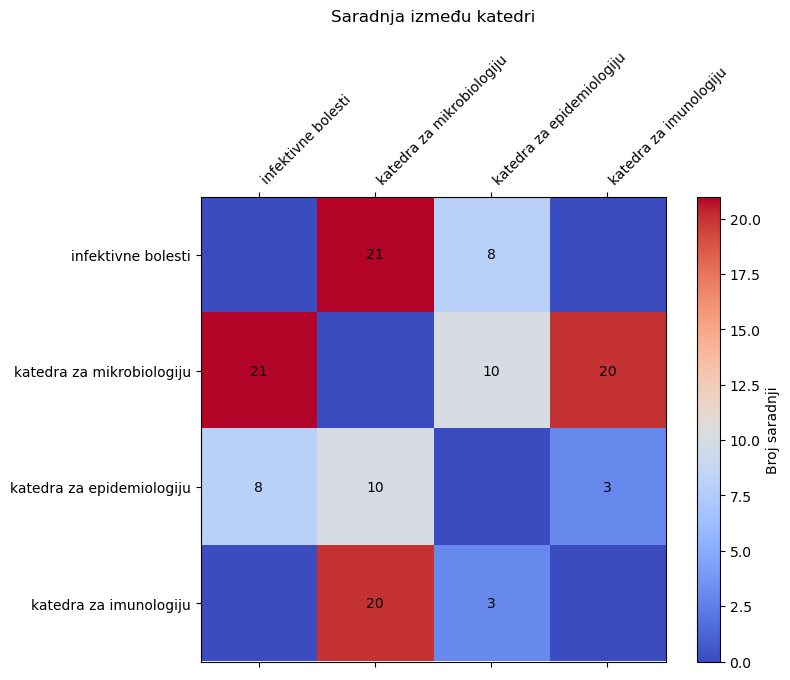

In [49]:
katedra_set=['infektivne bolesti','katedra za mikrobiologiju','katedra za epidemiologiju','katedra za imunologiju']
saradnja_matrix = np.zeros((len(katedra_set), len(katedra_set)))
for katedra_pair, count in katedra_collaborations.items():
    saradnja_matrix[katedra_set.index(katedra_pair[0]),katedra_set.index(katedra_pair[1])] = count
    saradnja_matrix[katedra_set.index(katedra_pair[1]),katedra_set.index(katedra_pair[0])] = count


plt.figure(figsize=(8, 6))
plt.matshow(saradnja_matrix, cmap='coolwarm', fignum=1)

plt.xticks(range(len(katedra_set)), katedra_set, rotation=45, ha='left')
plt.yticks(range(len(katedra_set)), katedra_set)

for (i, j), val in np.ndenumerate(saradnja_matrix):
    if val > 0: 
        plt.text(j, i, f'{int(val)}', ha='center', va='center', color='black')

plt.colorbar(label='Broj saradnji')
plt.title('Saradnja između katedri', pad=20)
plt.savefig('saradnja_katedri.png')
plt.show()


Top 10 bridzeva i njihove katedre:

In [52]:
sorted_bredges = list(sorted_dict.items())
for i in range(0,10):
    print(sorted_bredges[i], G.nodes[sorted_bredges[i][0]])

('ivana lazarevic', 9) {'katedra': 'katedra za mikrobiologiju'}
('maja cupic', 8) {'katedra': 'katedra za mikrobiologiju'}
('goran stevanovic', 7) {'katedra': 'infektivne bolesti'}
('vera pravica', 6) {'katedra': 'katedra za imunologiju'}
('dusan popadic', 6) {'katedra': 'katedra za imunologiju'}
('ljiljana markovic-denic', 6) {'katedra': 'katedra za epidemiologiju'}
('aleksandar dzamic', 5) {'katedra': 'katedra za mikrobiologiju'}
('aleksandra knezevic', 5) {'katedra': 'katedra za mikrobiologiju'}
('vladimir trajkovic', 5) {'katedra': 'katedra za imunologiju'}
('tatjana pekmezovic', 5) {'katedra': 'katedra za epidemiologiju'}
